In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import func

In [59]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [61]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables

In [62]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [63]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [65]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

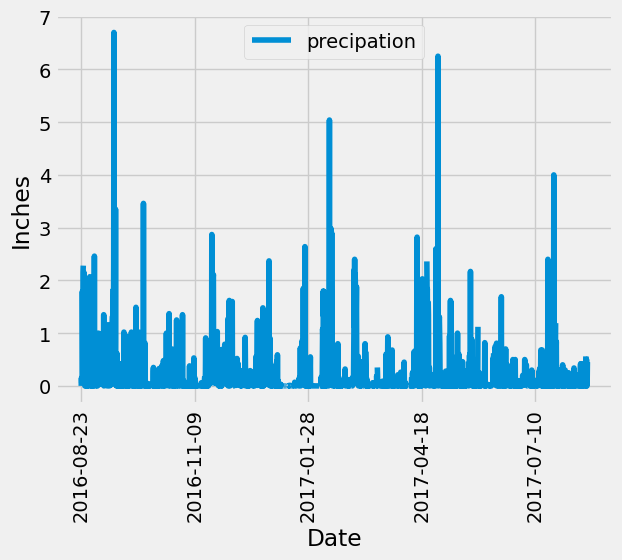

In [66]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

####TEST QUERY#####
# prev_year_rain = session.query(measurement.date).\
#     filter(measurement.date >= prev_year)

# for x in prev_year_rain:
#     print(x)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,
       measurement.prcp]

precipation_scores = session.query(*sel).\
    filter(measurement.date >=prev_year).\
    order_by(measurement.date)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipation_scores, columns=['date', 'precipation'])
prcp_df

# Sort the dataframe by date (done in the query above using the order_by statement

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y= 'precipation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [67]:
sel = [measurement.date,
       measurement.prcp]
precipitation = session.query(*sel).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

for x in precipitation:
    print(x)


('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = prcp_df.describe()
summary_table

,precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.station).count()
print(stations)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#this is incorrect code
# active_stations = session.query(measurement.station).\
#     group_by().\
#     count(measurement.station)

# for x in active_stations:
#     print(x)

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).\
    desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.sum(measurement.tobs)/func.count(measurement.tobs)]
most_active_station = session.query(*sel).\
    filter(measurement.station == "USC00519281").all()

print(most_active_station)


[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [ ]:
#PRACTICE LOOP FOR QUERY IN APP##
# sel = [measurement.date, 
#    func.min(measurement.tobs), 
#    func.max(measurement.tobs), 
#    func.avg(measurement.tobs)]
# start = session.query(*sel).\
#    group_by(measurement.date)
# # print(start)
# # for x in start:
# #    print(x)

# datesNtemps = []
# for date, min_temp, max_temp, avg_temp in start:
#     start_dict = {}
#     start_dict['date'] = date
#     start_dict['min_temp'] = min_temp
#     start_dict['max_temp'] = max_temp
#     start_dict['avg_temp'] = avg_temp
#     datesNtemps.append(start_dict)

# print(datesNtemps)


[{'date': '2010-01-01', 'min_temp': 65.0, 'max_temp': 75.0, 'avg_temp': 69.71428571428571}, {'date': '2010-01-02', 'min_temp': 61.0, 'max_temp': 75.0, 'avg_temp': 67.0}, {'date': '2010-01-03', 'min_temp': 67.0, 'max_temp': 77.0, 'avg_temp': 74.0}, {'date': '2010-01-04', 'min_temp': 72.0, 'max_temp': 76.0, 'avg_temp': 75.0}, {'date': '2010-01-05', 'min_temp': 73.0, 'max_temp': 76.0, 'avg_temp': 74.5}, {'date': '2010-01-06', 'min_temp': 71.0, 'max_temp': 76.0, 'avg_temp': 73.33333333333333}, {'date': '2010-01-07', 'min_temp': 68.0, 'max_temp': 74.0, 'avg_temp': 70.42857142857143}, {'date': '2010-01-08', 'min_temp': 63.0, 'max_temp': 73.0, 'avg_temp': 65.57142857142857}, {'date': '2010-01-09', 'min_temp': 67.0, 'max_temp': 70.0, 'avg_temp': 68.57142857142857}, {'date': '2010-01-10', 'min_temp': 70.0, 'max_temp': 75.0, 'avg_temp': 72.71428571428571}, {'date': '2010-01-11', 'min_temp': 64.0, 'max_temp': 72.0, 'avg_temp': 66.71428571428571}, {'date': '2010-01-12', 'min_temp': 57.0, 'max_temp

In [55]:
###PRACTICE FOR LOOP QUERY IN APP###
# # Select the required fields with aggregate functions
# sel = [
#     measurement.date,
#     func.min(measurement.tobs),
#     func.max(measurement.tobs),
#     func.sum(measurement.tobs) / func.count(measurement.tobs),
#     ]

# # Query the database for data starting from the specified date
# query_result = session.query(*sel).\
#     filter(measurement.date >= '2010-01-05').\
#     filter(measurement.date <= '2010-02-05').\
#     group_by(measurement.date).all()
# print(query_result)
#     # Format the results into a list of dictionaries
# datesNtemps = []
# for date, min_temp, max_temp, avg_temp in query_result:
#     start_dict = {
#         "date": date,
#         "min_temp": min_temp,
#         "max_temp": max_temp,
#         "avg_temp": avg_temp,
#         }
# datesNtemps.append(start_dict)



[('2010-01-05', 73.0, 76.0, 74.5), ('2010-01-06', 71.0, 76.0, 73.33333333333333), ('2010-01-07', 68.0, 74.0, 70.42857142857143), ('2010-01-08', 63.0, 73.0, 65.57142857142857), ('2010-01-09', 67.0, 70.0, 68.57142857142857), ('2010-01-10', 70.0, 75.0, 72.71428571428571), ('2010-01-11', 64.0, 72.0, 66.71428571428571), ('2010-01-12', 57.0, 68.0, 61.57142857142857), ('2010-01-13', 57.0, 68.0, 61.5), ('2010-01-14', 65.0, 69.0, 66.42857142857143), ('2010-01-15', 56.0, 69.0, 64.83333333333333), ('2010-01-16', 65.0, 71.0, 67.33333333333333), ('2010-01-17', 64.0, 70.0, 68.0), ('2010-01-18', 70.0, 77.0, 73.0), ('2010-01-19', 61.0, 75.0, 69.42857142857143), ('2010-01-20', 66.0, 72.0, 67.85714285714286), ('2010-01-21', 68.0, 71.0, 69.5), ('2010-01-22', 60.0, 67.0, 63.5), ('2010-01-23', 67.0, 78.0, 73.83333333333333), ('2010-01-24', 71.0, 76.0, 73.16666666666667), ('2010-01-25', 65.0, 72.0, 67.14285714285714), ('2010-01-26', 69.0, 77.0, 74.71428571428571), ('2010-01-27', 65.0, 71.0, 68.7142857142857

In [17]:
###TESTING QUERIES###
# temperature = session.query(measurement.tobs).\
#     filter(measurement.date <= '2017-08-23').\
#     filter(measurement.date >= '2016-08-23').\
#     group_by(measurement.tobs).all()

# temperature

In [18]:
#THIS DOESN'T WORK!!! IGNORE!

# sel = [measurement.date,
#        measurement.tobs,
#        func.count(measurement.tobs)]
# temperature = session.query(*sel).\
#     filter(measurement.date <= '2017-08-23').\
#     filter(measurement.date >= '2016-08-23').\
#     group_by(measurement.tobs).all()

# print(temperature)

In [19]:
# THIS DOESN'T WORK!!!!
# data = [('2017-04-30', 58.0, 1), ('2017-02-02', 59.0, 3), ('2017-01-08', 60.0, 6), ('2017-02-02', 61.0, 4), ('2016-12-16', 62.0, 13), ('2017-01-03', 63.0, 15), ('2017-01-06', 64.0, 23), ('2017-01-14', 65.0, 28), ('2016-12-12', 66.0, 31), ('2016-12-06', 67.0, 54), ('2016-11-29', 68.0, 56), ('2016-12-03', 69.0, 92), ('2016-12-09', 70.0, 110), ('2016-11-07', 71.0, 121), ('2016-11-11', 72.0, 125), ('2016-11-26', 73.0, 117), ('2016-11-24', 74.0, 174), ('2016-09-04', 75.0, 171), ('2016-09-06', 76.0, 210), ('2016-08-27', 77.0, 212), ('2016-08-28', 78.0, 198), ('2016-08-24', 79.0, 158), ('2016-08-25', 80.0, 156), ('2016-08-23', 81.0, 89), ('2016-09-23', 82.0, 42), ('2017-06-12', 83.0, 12), ('2016-08-26', 84.0, 6), ('2017-08-19', 85.0, 1), ('2017-05-23', 87.0, 2)]
# df_temps = pd.DataFrame(data, columns= ['Date', 'Temp', 'Temp Count']).drop(columns='Date')
# df_temps

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).\
    filter(measurement.date >= dt.date(2016, 8, 23)).\
    filter(measurement.station == "USC00519281")
#make query results into a dataframe
df = pd.DataFrame(temps)
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


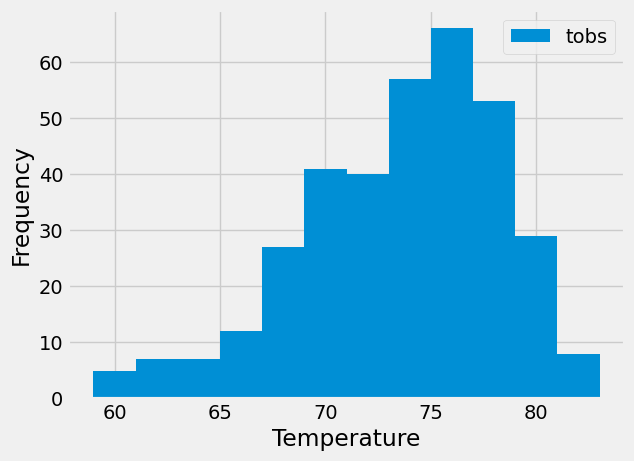

In [69]:
#plot the data frame and make it into a histogram

df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [22]:
# Close Session
session.close()